<span style="color:#B982ED ">-></span> All the needed libraries are imported!

In [28]:
# Creating dataset and controling
from sklearn.datasets import make_circles
import pandas as pd
# Spliting datas into train_set and test_set
from sklearn.model_selection import train_test_split
# Creating Neural Network
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Flatten
# Plotting
import matplotlib.pyplot as plt
# Confusion matrix / Section 2
from keras.datasets import fashion_mnist
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

import tensorflow as ts
from tensorflow.keras.utils import to_categorical
import numpy as np

<span style="color:#B982ED ">Section 1</span>

<span style="color:#B982ED ">-></span> Create 200 circles randomly using the given library!

 ما در اینجا 200 دایره را به کمک کتابخانه ی داده شده به صورت راندوم بدست آوردیم و سپس برای نمایش بهتر آن را کشیدیم.

In [29]:
x,label = make_circles(n_samples=200, shuffle=True, noise=0.05 , random_state=None, factor=0.8)

circles = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label':label})
circles


,x,y,label
0,0.516619,0.552539,1
1,-0.226272,-1.004979,0
2,-0.477280,-0.510709,1
3,0.532607,0.514847,1
4,-0.757353,-0.696851,0
...,...,...,...
195,0.233308,0.646664,1
196,-0.018892,0.948202,0
197,-0.954553,0.009078,0
198,0.127018,0.767021,1


<AxesSubplot:xlabel='x', ylabel='y'>

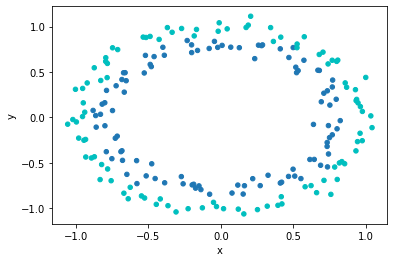

In [30]:
colors = np.where(circles.label == 1, 'tab:blue', 'c')
circles.plot.scatter(x='x', y='y', c=colors)

In [31]:
positions_train, positions_test, label_train, label_test = train_test_split(x, label, random_state=10, train_size = .65)

بعد از اینکه داده های اولیه خود را دسته بندی کردیم، شبکه ی عصبی خود را میسازیم. این شبکه دارای 4 لایه است، یک لایه ی ورودی، دو لایه ی پنهان و یک لایه ی خروجی. 

In [32]:
hidden_layer1 = 80
hidden_layer2 = 60
epoch_size = 100

In [33]:
model1 = Sequential()
model1.add(Dense(hidden_layer1, input_dim=2))
model1.add(Dense(hidden_layer2))
model1.add(Dense(1))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model1.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model1.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 4.2054 - accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 3.4284 - accuracy: 0.4846
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 2.9084 - accuracy: 0.4385
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1903 - accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7454 - accuracy: 0.5308
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.4923
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.4846
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4923
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5231
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5077
Epoch 11/100
5/5 [===========

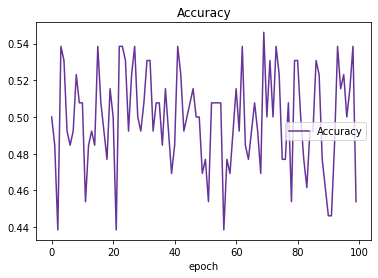

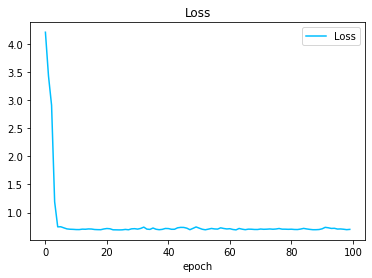

In [34]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

با توجه به نتایج بدست آمده، همانطور که مشاهده می شود نتایج چندان خوبی بدست نیامده است و مدل دارای 50 درصد صحت است. این موضوع به این دلیل است که ما هنگام ساخت شبکه ی عصبی خود از هیچ تابع فعالیتی استفاده نکرده ایم.

In [35]:
# make class predictions with the model
predictions = (model1.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/75*100)

49.333333333333336


بعد از اینکه مدل را با داده های تست، آزمایش میکنیم همانطور که میبینیم نتایج خوبی بدست نیامده است. در صورت اضافه کردن تابع فعالیت خطی نتایج مانند قبل خواهد شد.

In [36]:
model2 = Sequential()
model2.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model2.add(Dense(hidden_layer2, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model2.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model2.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5385
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5308
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5385
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5615
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5538
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5308
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5538
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5538
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5538
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5538
Epoch 11/100
5/5 [===========

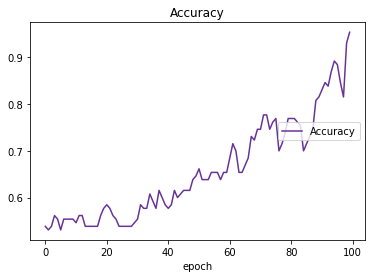

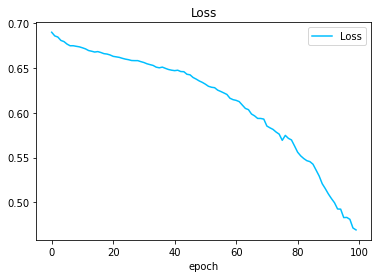

In [37]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [38]:
# make class predictions with the model
predictions = (model2.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/75*100)

82.66666666666667


با اضافه شدن تابع فعالیت نتایج بدست آمده کمی بهتر میشود. دو تابع فعالیت در اینجا استفاده شده است.
ReLU و Sigmoid

با توجه به تست های انجام شده، ترکیب این دو با هم نتایج بهتری خواهد داشت.

In [39]:
model3 = Sequential()
model3.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model3.add(Dense(hidden_layer2, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
log = model3.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model3.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.5231
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.5231
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.5385
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.5385
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.5385
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.5385
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.5385
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.5385
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.5385
Epoch 11/100
5/5 [===========

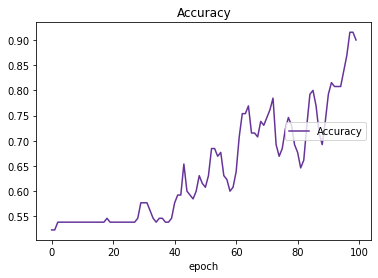

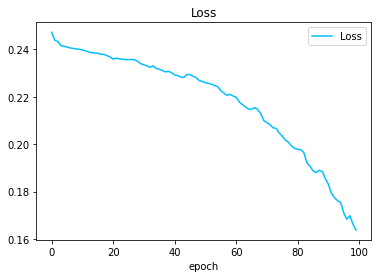

In [40]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [41]:
# make class predictions with the model
predictions = (model3.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/75*100)

76.0


با اضافه شدن خظای مناسب نتایج بهتری حاصل میشود و صحت بهتری حاصل شده است.

In [42]:
model4 = Sequential()
model4.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
log = model4.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model4.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5077
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.5308
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.5077
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5077
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5231
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.5231
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.5385
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5154
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.5231
Epoch 11/100
5/5 [===========

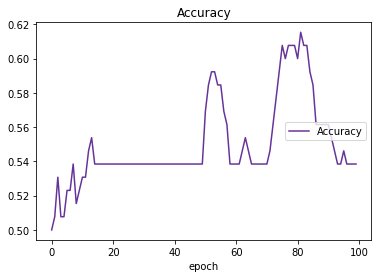

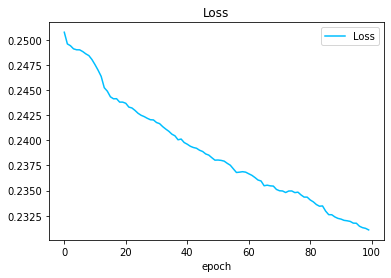

In [43]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [44]:
# make class predictions with the model
predictions = (model4.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/75*100)

40.0


با کم کردن یک لایه، نتیجه ی بدست آمده بدتر شده است. این موضوع نشان میدهد افزایش تعداد لایه هایه ها نتیجه ی بهتری در یادگیری ماشین میگذارد.

In [45]:
#Lower learning rate 
model5 = Sequential()
model5.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model5.add(Dense(hidden_layer2, activation = 'relu'))
model5.add(Dense(1, activation = 'sigmoid'))
optimizer = adam_v2.Adam(learning_rate=0.0001)
model5.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
log1 = model5.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model5.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.4923
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.5077
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.5231
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.5462
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.5308
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.5462
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.5231
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.5385
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.5385
Epoch 11/100
5/5 [===========

In [46]:
#Higher learning rate 
model6 = Sequential()
model6.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model6.add(Dense(hidden_layer2, activation = 'relu'))
model6.add(Dense(1, activation = 'sigmoid'))
optimizer = adam_v2.Adam(learning_rate=3)
model6.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
log2 = model6.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model6.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.5385
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.5385
Epoch 11/100
5/5 [===========

In [84]:
#The best learning rate 
model7 = Sequential()
model7.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model7.add(Dense(hidden_layer2, activation = 'relu'))
model7.add(Dense(1, activation = 'sigmoid'))
optimizer = adam_v2.Adam(learning_rate=0.1)
model7.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
log3 = model7.fit(positions_train, label_train, epochs=epoch_size)
_, accuracy_model = model7.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.4385
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.5462
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.4846
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.5462
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.5231
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.6538
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.6538
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.7846
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.7462
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.6462
Epoch 11/100
5/5 [===========

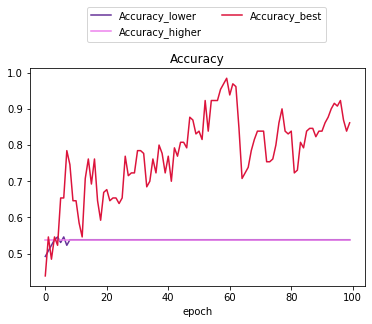

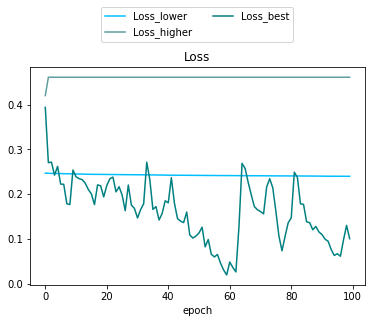

In [85]:
# For Accuracy
plt.plot(log1.history['accuracy'], color='rebeccapurple', label='Accuracy_lower')
plt.plot(log2.history['accuracy'], color='violet', label='Accuracy_higher')
plt.plot(log3.history['accuracy'], color='crimson', label='Accuracy_best')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'lower right', bbox_to_anchor =(0.9, 1.10), ncol = 2)
plt.show()
# For Loss
plt.plot(log1.history['loss'], color='deepskyblue', label='Loss_lower')
plt.plot(log2.history['loss'], color='cadetblue', label='Loss_higher')
plt.plot(log3.history['loss'], color='teal', label='Loss_best')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor =(0.8, 1.30), ncol = 2)
plt.show()

In [86]:
# make class predictions with the model (Lower rating rate)
predictions = (model5.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count+0 
print(count/len(predictions)*100)

# make class predictions with the model (Higher rating rate)
predictions = (model6.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/len(predictions)*100)

# make class predictions with the model (The best rating rate)
predictions = (model7.predict(positions_test) > 0.5).astype(int)
count = 0 
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
print(count/len(predictions)*100)

42.857142857142854
42.857142857142854
87.14285714285714


همانطور که میبینیم عددی که بدست آمده است که خیلی بهتر شده است و صحت بدست آمده در دو مرحله بسیار بهم نزدیک است.

با زیاد کردن ضریب یادگیری صحت کاهش پیدا میکند. چرا که حول نقطه ی مورد نظر با سرعت زیادی نوسان میکند و به نتیجه ی دلخواه نمیرسیم.

با کم کردن ضریب یادگیری، با سرعت کمتری حرکت میکند و این باعث میشود در آن تعداد 
epoch
تعریف شده نتواند به نتیجه ی مورد نظر برسد.

In [94]:
model8 = Sequential()
model8.add(Dense(hidden_layer1, input_dim=2, activation = 'relu'))
model8.add(Dense(hidden_layer2, activation = 'relu'))
model8.add(Dense(1, activation = 'sigmoid'))
optimizer = adam_v2.Adam(learning_rate=0.1)
model8.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
log3 = model8.fit(positions_train, label_train, epochs=epoch_size, verbose=0)
_, accuracy_model = model8.evaluate(positions_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9923
Accuracy: 99.23


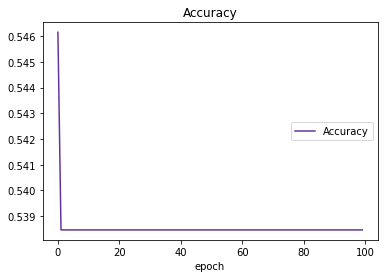

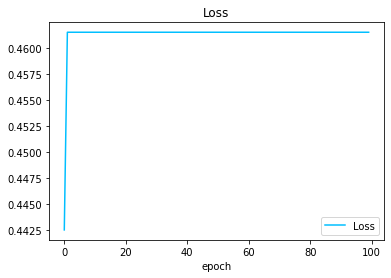

In [95]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [96]:
# make class predictions with the model
predictions = (model8.predict(positions_test) > 0.5).astype(int)
count = 0 
counter = 0
for i in range(len(predictions)):
    count = count+1 if label_test[i] == predictions[i] else count + 0 
    counter += 1
print(count/counter*100)

94.28571428571428


با توجه به تست هایی که در مراحل قبل انجام دادیم و تست کردن نتایج مختلف در سایت معرفی شده ، با قرارگیری اعداد قرار داده شده بهترین نتیجه ی ممکن را بدست می آوریم.


در این شبکه ی عصبی دو لایه ی مخفی وجود دارد که لایه ی اول 80 و لایه ی دوم 60 تعداد نود دارد و نرخ یادگیری برابر با 0.1 است. با توجه به موارد گفته شده نتیجه ی خیلی خوبی دریافت کردیم..